In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
import datetime 
rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False

In [24]:
status = '수면'
deviceNumArray = []
studentRecordDfArr = []

for i in range(0,7):
    studentRecordDf = pd.read_excel("/Users/hyennaeon/Downloads/하틴루_데이터수집_기록표_전원.xlsx", sheet_name=i)
    studentRecordDf = studentRecordDf.loc[studentRecordDf['상태'] == status]
    studentRecordDf = studentRecordDf.reset_index(drop=True)
    deviceNumArray.append((studentRecordDf['기기 번호'][0]))
    studentRecordDfArr.append(studentRecordDf)
startDate = '20230420'
endDate = '20230530'
indexNameArray = ['hr','hr_conv','br','br_conv','mot','r','speed','temperature','humidity','d2']
nameArray = ['하원','효은','민우','명균','지원','정민','채별']

In [25]:
studentDf = pd.DataFrame()

for i in range(0,7):
    Url = 'http://52.231.67.67:3000/api/sensorData/duration?deviceNo='+str(deviceNumArray[i])+'&startDate=' + '20230420' + '&endDate=' + '20230701'
    studentWholeDf = pd.read_json(Url)
    studentWholeDf = studentWholeDf.sort_index(ascending=False)
    studentWholeDf = studentWholeDf.reset_index(drop=True)
    studentWholeDf['regdate'] = pd.to_datetime(studentWholeDf['regdate'])
    studentWholeDf['regdate'] = studentWholeDf['regdate'].dt.strftime("%Y-%m-%d %H:%M")
    for j in range(0, len(studentRecordDfArr[i])):
        startDate = str(pd.to_datetime(studentRecordDfArr[i]['숙면 시작 날짜/시간'][j]))
        endDate = str(pd.to_datetime(studentRecordDfArr[i]['숙면 종료 날짜/시간'][j]))
        mask = (studentWholeDf['regdate'] > startDate) & (studentWholeDf['regdate'] < endDate) 
        Df = studentWholeDf[mask]
        Df['userId'] = i
        studentDf = pd.concat([studentDf, Df])
# studentDf.to_csv("/Users/hyennaeon/Desktop/Hatinroo/HatinrooData/ActiveData.csv")


/var/folders/3c/mjclf_6d0wlfk3rpvcxcvdz80000gn/T/ipykernel_22074/988714660.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df['userId'] = i
/var/folders/3c/mjclf_6d0wlfk3rpvcxcvdz80000gn/T/ipykernel_22074/988714660.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df['userId'] = i
/var/folders/3c/mjclf_6d0wlfk3rpvcxcvdz80000gn/T/ipykernel_22074/988714660.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

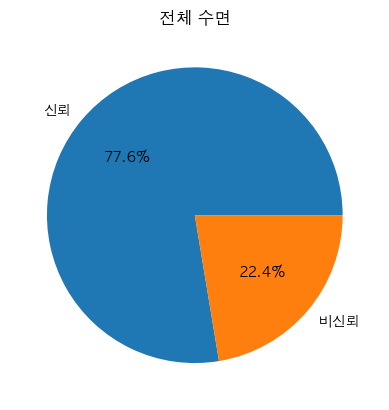

In [26]:
# Df = studentDf
# ratio = [len(Df[Df['hr'] != 0]), len(Df[Df['hr'] == 0])]
# labels = ['신뢰', '비신뢰']
# plt.title("전체 " + status)
# plt.pie(ratio, labels=labels, autopct='%.1f%%')
# plt.savefig('/Users/hyennaeon/Desktop/Hatinroo/HatinrooData/전체'+status+'.png')
# plt.show()
for i in range(7):
    Df = studentDf[studentDf['userId'] == i]
    ratio = [len(Df[Df['hr'] == 4]), len(Df[Df['hr'] != 4])]
    labels = ['신뢰', '비신뢰']
    plt.title(nameArray[i] + " " + status)
    plt.pie(ratio, labels=labels, autopct='%.1f%%')
    plt.savefig('/Users/hyennaeon/Desktop/Hatinroo/HatinrooData/'+nameArray[i]+".png")
    plt.show()


/var/folders/3c/mjclf_6d0wlfk3rpvcxcvdz80000gn/T/ipykernel_56911/1064636987.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, 1)


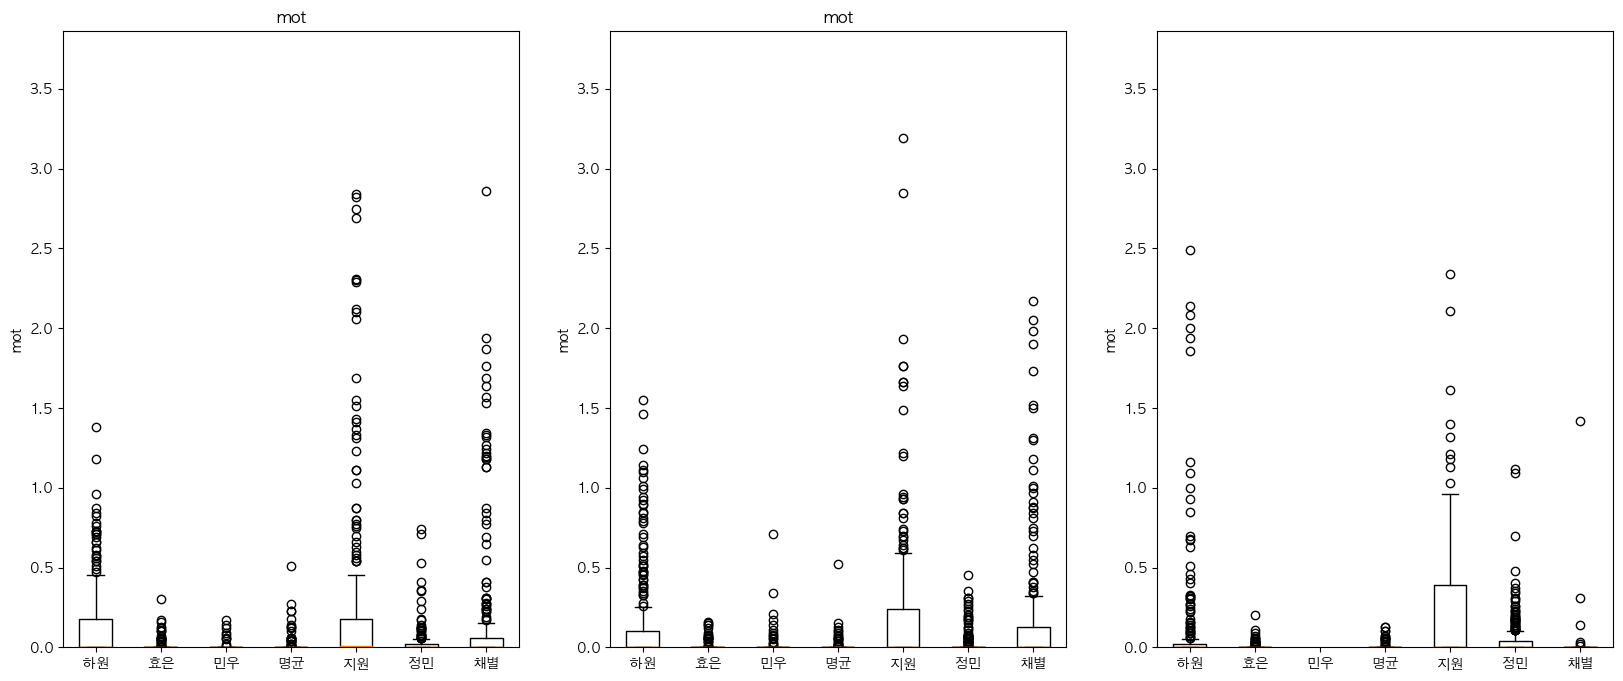

In [93]:
#보고싶은 열 이름 지정 
colName = 'mot'

plt.figure(figsize=(20, 8))

colArray = []
plt.title(colName)
for i in range(0,7):
    Df = studentDf[studentDf['userId'] == i]
    Df.reset_index(drop=True)
    colArray.append(Df[colName].iloc[0:240])
plt.subplot(1, 3, 1)    
plt.boxplot(colArray)
plt.ylim([studentDf[colName].min()*0.8, studentDf[colName].max()*1.1])
plt.ylabel(colName)
plt.xticks([1,2,3,4,5,6,7],labels=[nameArray[0],nameArray[1],nameArray[2],nameArray[3],nameArray[4],nameArray[5],nameArray[6]])

colArray = []
plt.title(colName)
for i in range(0,7):
    Df = studentDf[studentDf['userId'] == i]
    Df.reset_index(drop=True)
    colArray.append(Df[colName].iloc[240:480])   
plt.subplot(1, 3, 2)
plt.boxplot(colArray)
plt.ylabel(colName)
plt.ylim([studentDf[colName].min()*0.8, studentDf[colName].max()*1.1])
plt.xticks([1,2,3,4,5,6,7],labels=[nameArray[0],nameArray[1],nameArray[2],nameArray[3],nameArray[4],nameArray[5],nameArray[6]])

colArray = []
plt.title(colName)
for i in range(0,7):
    Df = studentDf[studentDf['userId'] == i]
    Df.reset_index(drop=True)
    colArray.append(Df[colName].iloc[480:720])
plt.subplot(1, 3, 3)
plt.boxplot(colArray)
plt.ylabel(colName)
plt.ylim([studentDf[colName].min()*0.8, studentDf[colName].max()*1.1])
plt.xticks([1,2,3,4,5,6,7],labels=[nameArray[0],nameArray[1],nameArray[2],nameArray[3],nameArray[4],nameArray[5],nameArray[6]])
plt.show()
